In [1]:
import os
import cde_mot_functions as cf
import ants

# Jupyter specific autoreloading for external functions (in case changes are made)
%load_ext autoreload
%autoreload 2

In [2]:
# Get fish specifications
#-------------------------------------------------------------------------------
Fbase    = '/Volumes/MARIANNE/1812 Critical Dynamics in Epilepsy'
Fish     = cf.cde_mot_fishdef(Fbase)

Working on fish 1 of 2, condition: BL
I found 7226 images
Of these Im loading 50
Im ignoring the first volume


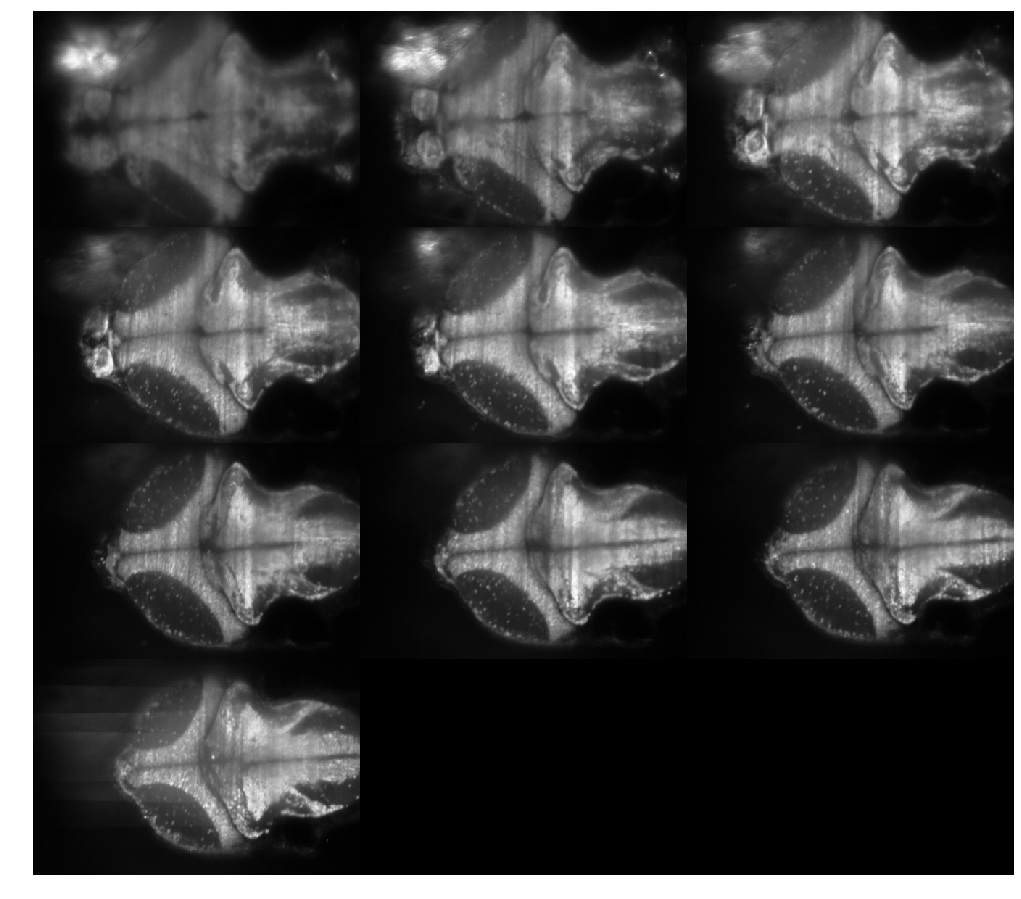

>> Starting rigid registration <<
Completed 100.0% at 2019-02-24 21:12:19
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


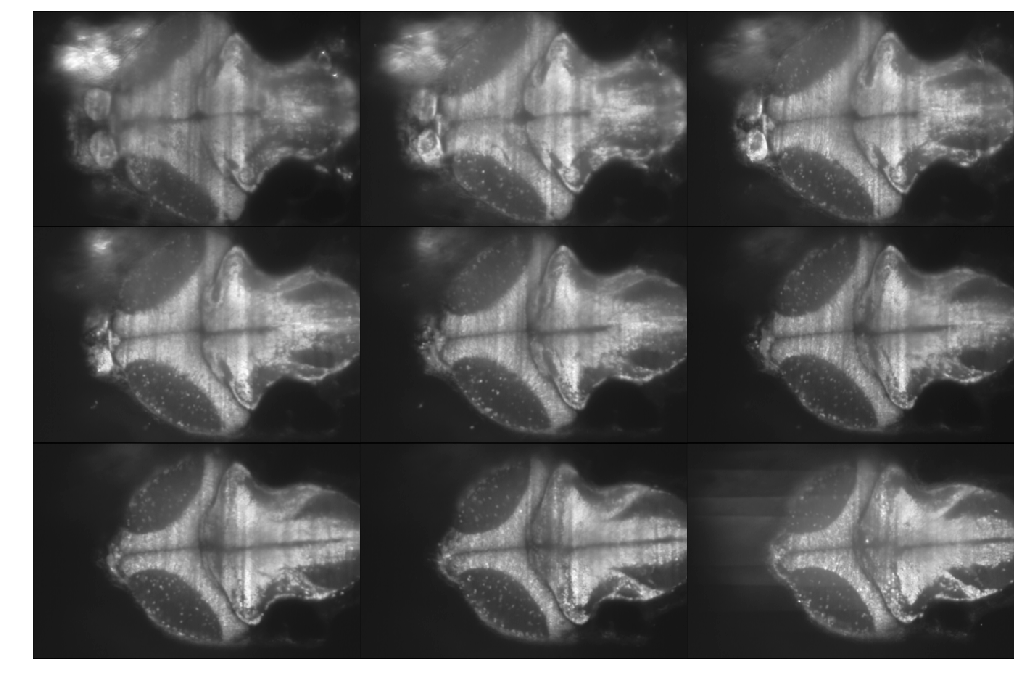

>> Starting rigid registration <<
Completed 50.0% at 2019-02-24 22:27:06
Completed 100.0% at 2019-02-24 23:49:14
All done with rigid registration
The returned file contains tifs
Working on fish 1 of 2, condition: PTZ
I found 16800 images
Of these Im loading 50
Im ignoring the first volume


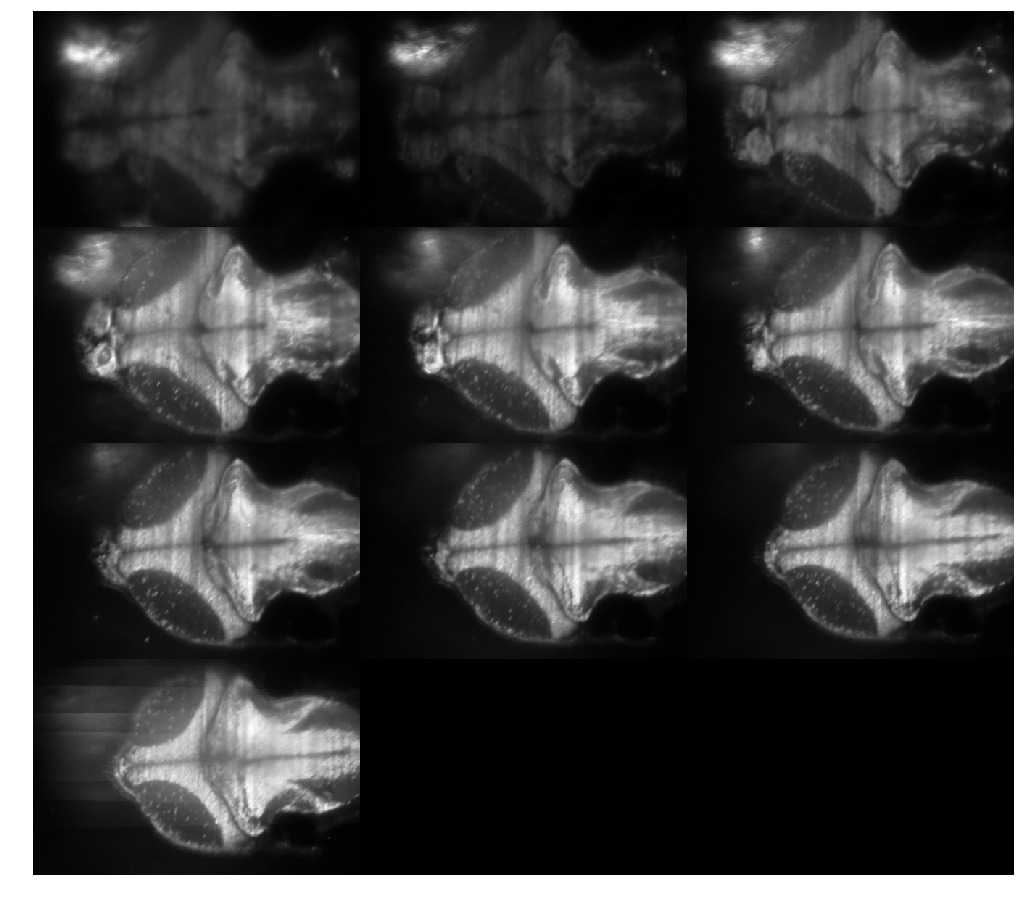

>> Starting rigid registration <<
Completed 100.0% at 2019-02-24 23:50:09
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


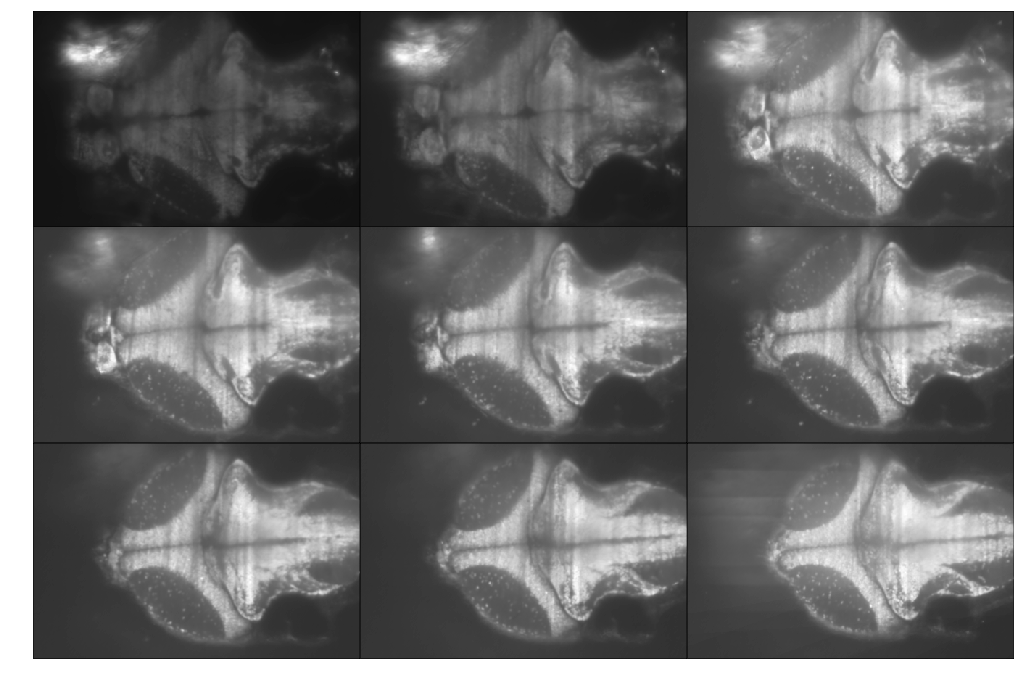

>> Starting rigid registration <<
Completed 5.0% at 2019-02-25 00:06:22
Completed 10.0% at 2019-02-25 00:19:13
Completed 15.0% at 2019-02-25 00:31:29
Completed 20.0% at 2019-02-25 00:44:39
Completed 25.0% at 2019-02-25 00:58:22
Completed 30.0% at 2019-02-25 01:12:00
Completed 35.0% at 2019-02-25 01:24:50
Completed 40.0% at 2019-02-25 01:38:00
Completed 45.0% at 2019-02-25 01:50:59
Completed 50.0% at 2019-02-25 02:04:21
Completed 55.0% at 2019-02-25 02:17:53
Completed 60.0% at 2019-02-25 02:31:14
Completed 65.0% at 2019-02-25 02:44:30
Completed 70.0% at 2019-02-25 02:58:05
Completed 75.0% at 2019-02-25 03:12:09
Completed 80.0% at 2019-02-25 03:25:26
Completed 85.0% at 2019-02-25 03:38:51
Completed 90.0% at 2019-02-25 03:52:14
Completed 95.0% at 2019-02-25 04:05:33
Completed 100.0% at 2019-02-25 04:19:02
All done with rigid registration
The returned file contains tifs
Working on fish 2 of 2, condition: BL
I found 7199 images
Of these Im loading 50
Im ignoring the first volume


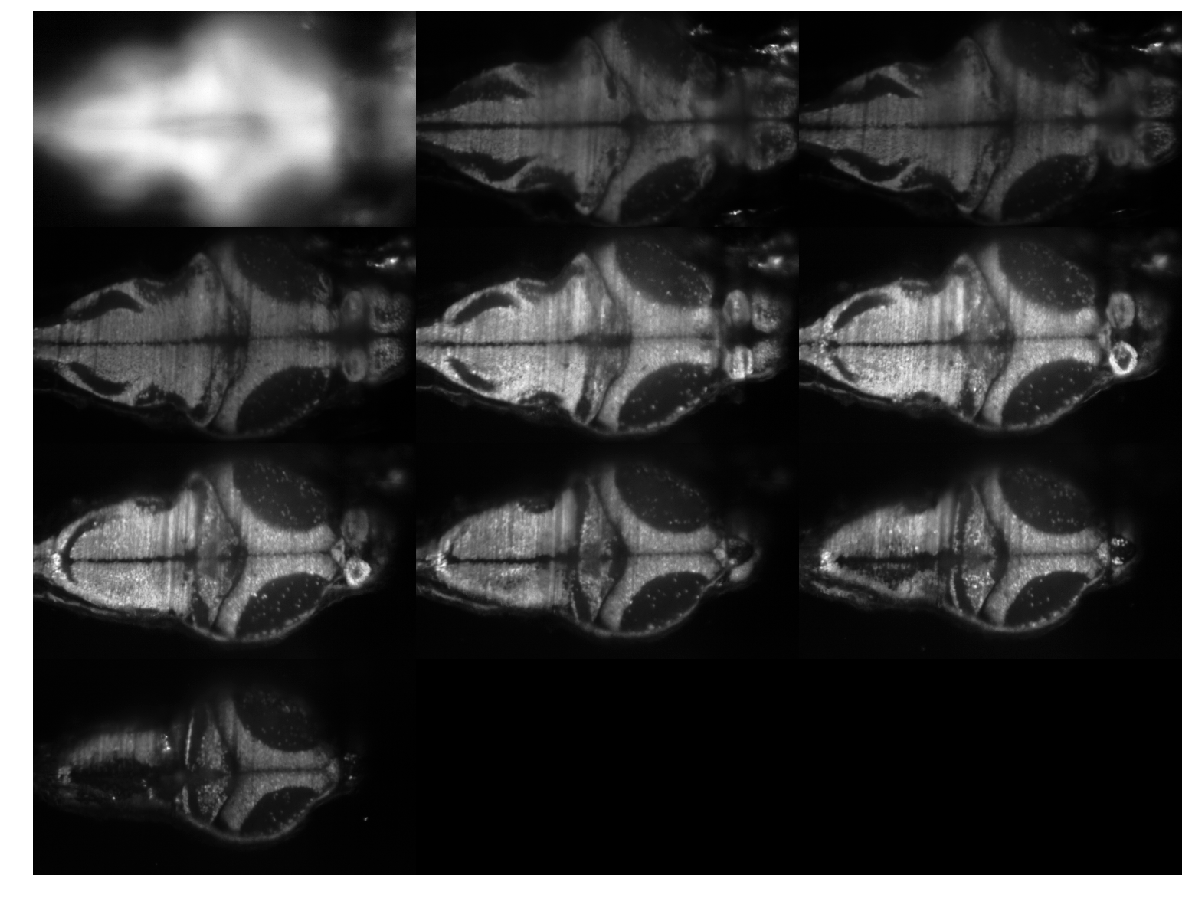

>> Starting rigid registration <<
Completed 100.0% at 2019-02-25 04:19:51
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


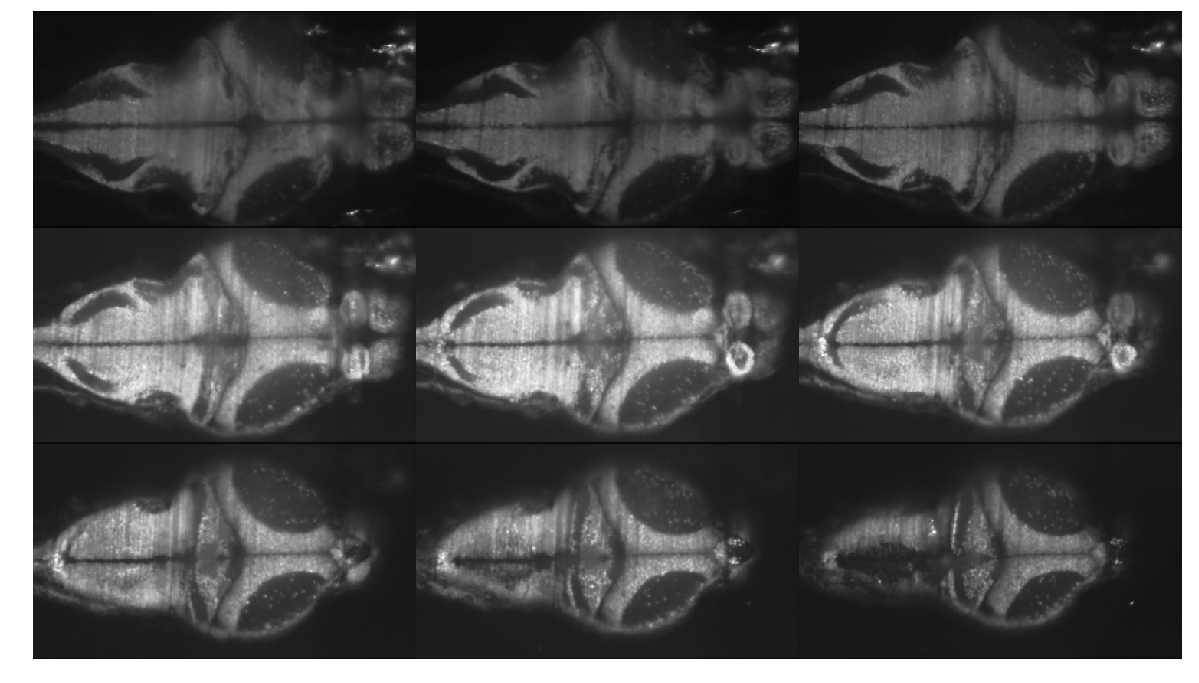

>> Starting rigid registration <<
All done with rigid registration
The returned file contains tifs
Working on fish 2 of 2, condition: PTZ
I found 14399 images
Of these Im loading 50
Im ignoring the first volume


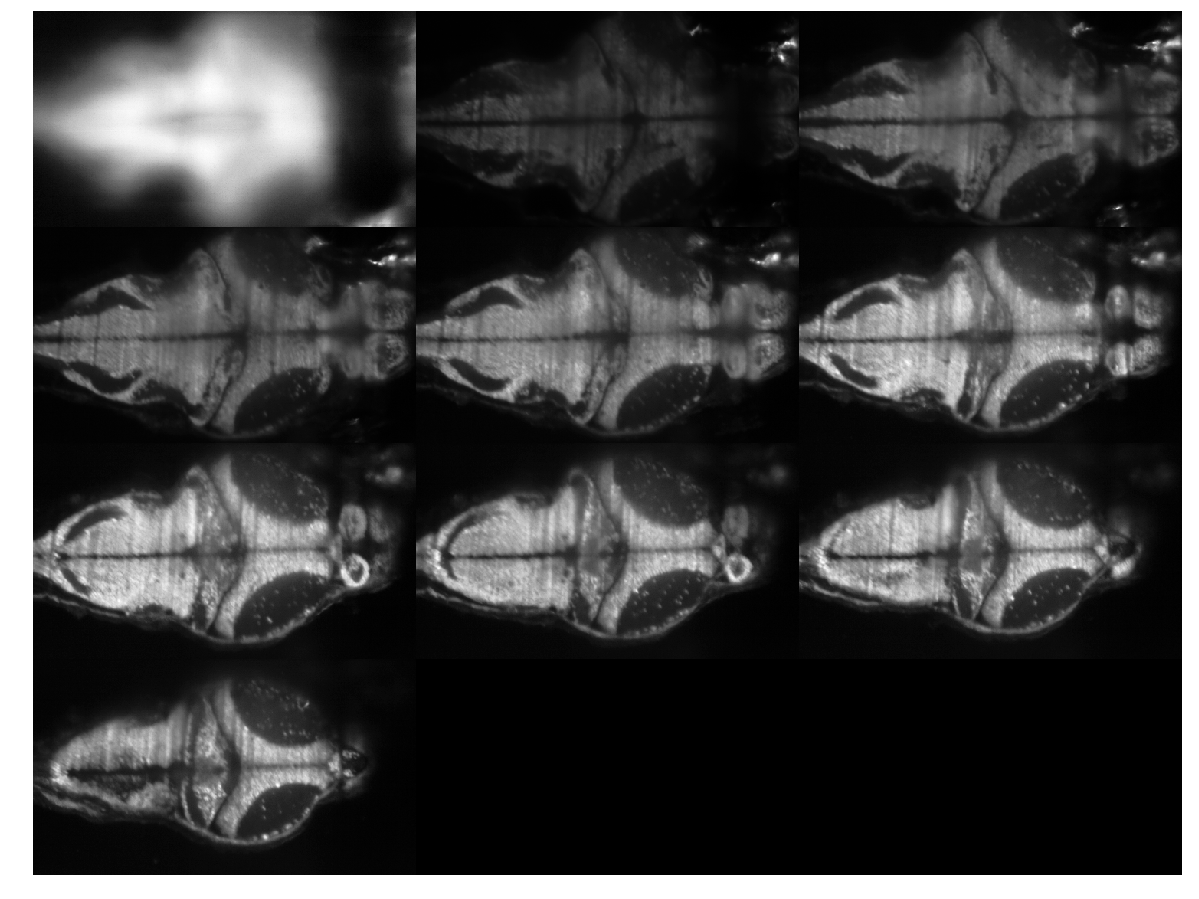

>> Starting rigid registration <<
Completed 100.0% at 2019-02-25 06:16:49
All done with rigid registration
I found 49 images
Of these Im loading 49
Im ignoring the first volume


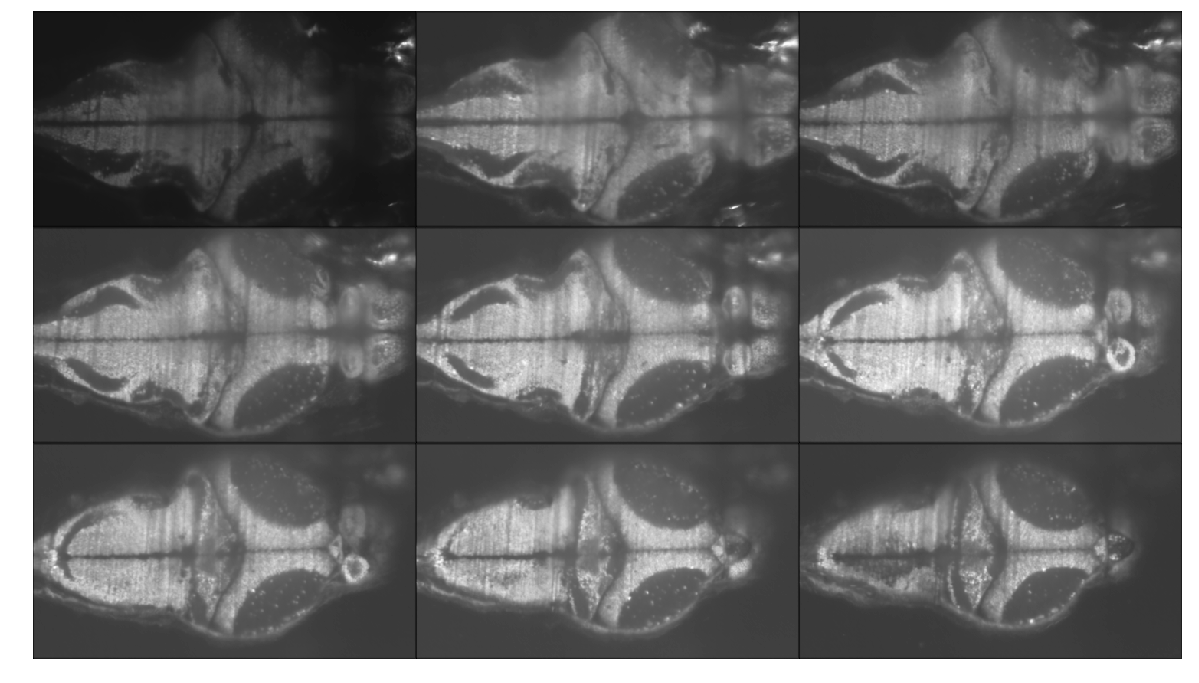

>> Starting rigid registration <<
Completed 100.0% at 2019-02-25 10:30:04
All done with rigid registration
The returned file contains tifs


In [3]:
# Produce mean image and run registration to the mean (rigid)
#-------------------------------------------------------------------------------
Fish  = cf.cde_mot_makepath(Fish, prefix = 'RM')

for f in range(len(Fish)):
    for c in range(len(Fish[f]["cond"])):
        
        print('=========================================================')
        print('Working on fish ' + str(f+1) + ' of ' + str(len(Fish)) + ', condition: ' + Fish[f]["cond"][c]["name"] )
        print('=========================================================')
        tifs  = Fish[f]["cond"][c]["tifs"]
        Fimg  = Fish[f]["cond"][c]["path"]
        Fsave = Fish[f]["cond"][c]["savepath"]

        # Calculate mean image - iterative rigid registration to find good mean image
        #-------------------------------------------------------------------------------
        mimg, imglist     = cf.cde_mot_meancalc(tifs, Fimg, noimages = 50)   # mimg is provisional mean image
        moved             = cf.cde_mot_rigidreg(mimg, imglist, Fimg)        # moved is provisionally registred images
        mimg2, imglist2   = cf.cde_mot_meancalc(moved, Fimg, crop = True)   # mimg2 is the post-reg mean image

        # run registration to mean
        #-------------------------------------------------------------------------------
        moved             = cf.cde_mot_rigidreg(mimg2, tifs, Fimg, saveprog = True,
                                                savesuff = Fish[f]["cond"][c]["name"][0], savedir = Fsave)

Completed 5.0% at 2018-12-15 18:34:05
Completed 10.0% at 2018-12-15 19:28:30
Completed 15.0% at 2018-12-15 20:29:08
Completed 20.0% at 2018-12-15 21:23:48
Completed 25.0% at 2018-12-15 22:15:49
Completed 30.0% at 2018-12-15 23:09:25
Completed 35.0% at 2018-12-16 00:07:47
Completed 40.0% at 2018-12-16 01:10:08
Completed 45.0% at 2018-12-16 01:59:57
Completed 50.0% at 2018-12-16 02:45:47
Completed 55.0% at 2018-12-16 03:29:56
Completed 60.0% at 2018-12-16 04:17:22
Completed 65.0% at 2018-12-16 05:06:12
Completed 70.0% at 2018-12-16 06:00:34
Completed 75.0% at 2018-12-16 06:54:19
Completed 80.0% at 2018-12-16 07:43:38
Completed 85.0% at 2018-12-16 08:34:20
Completed 90.0% at 2018-12-16 09:37:55
Completed 95.0% at 2018-12-16 10:58:19
Completed 100.0% at 2018-12-16 12:09:06
All done with rigid registration
The returned file contains tifs


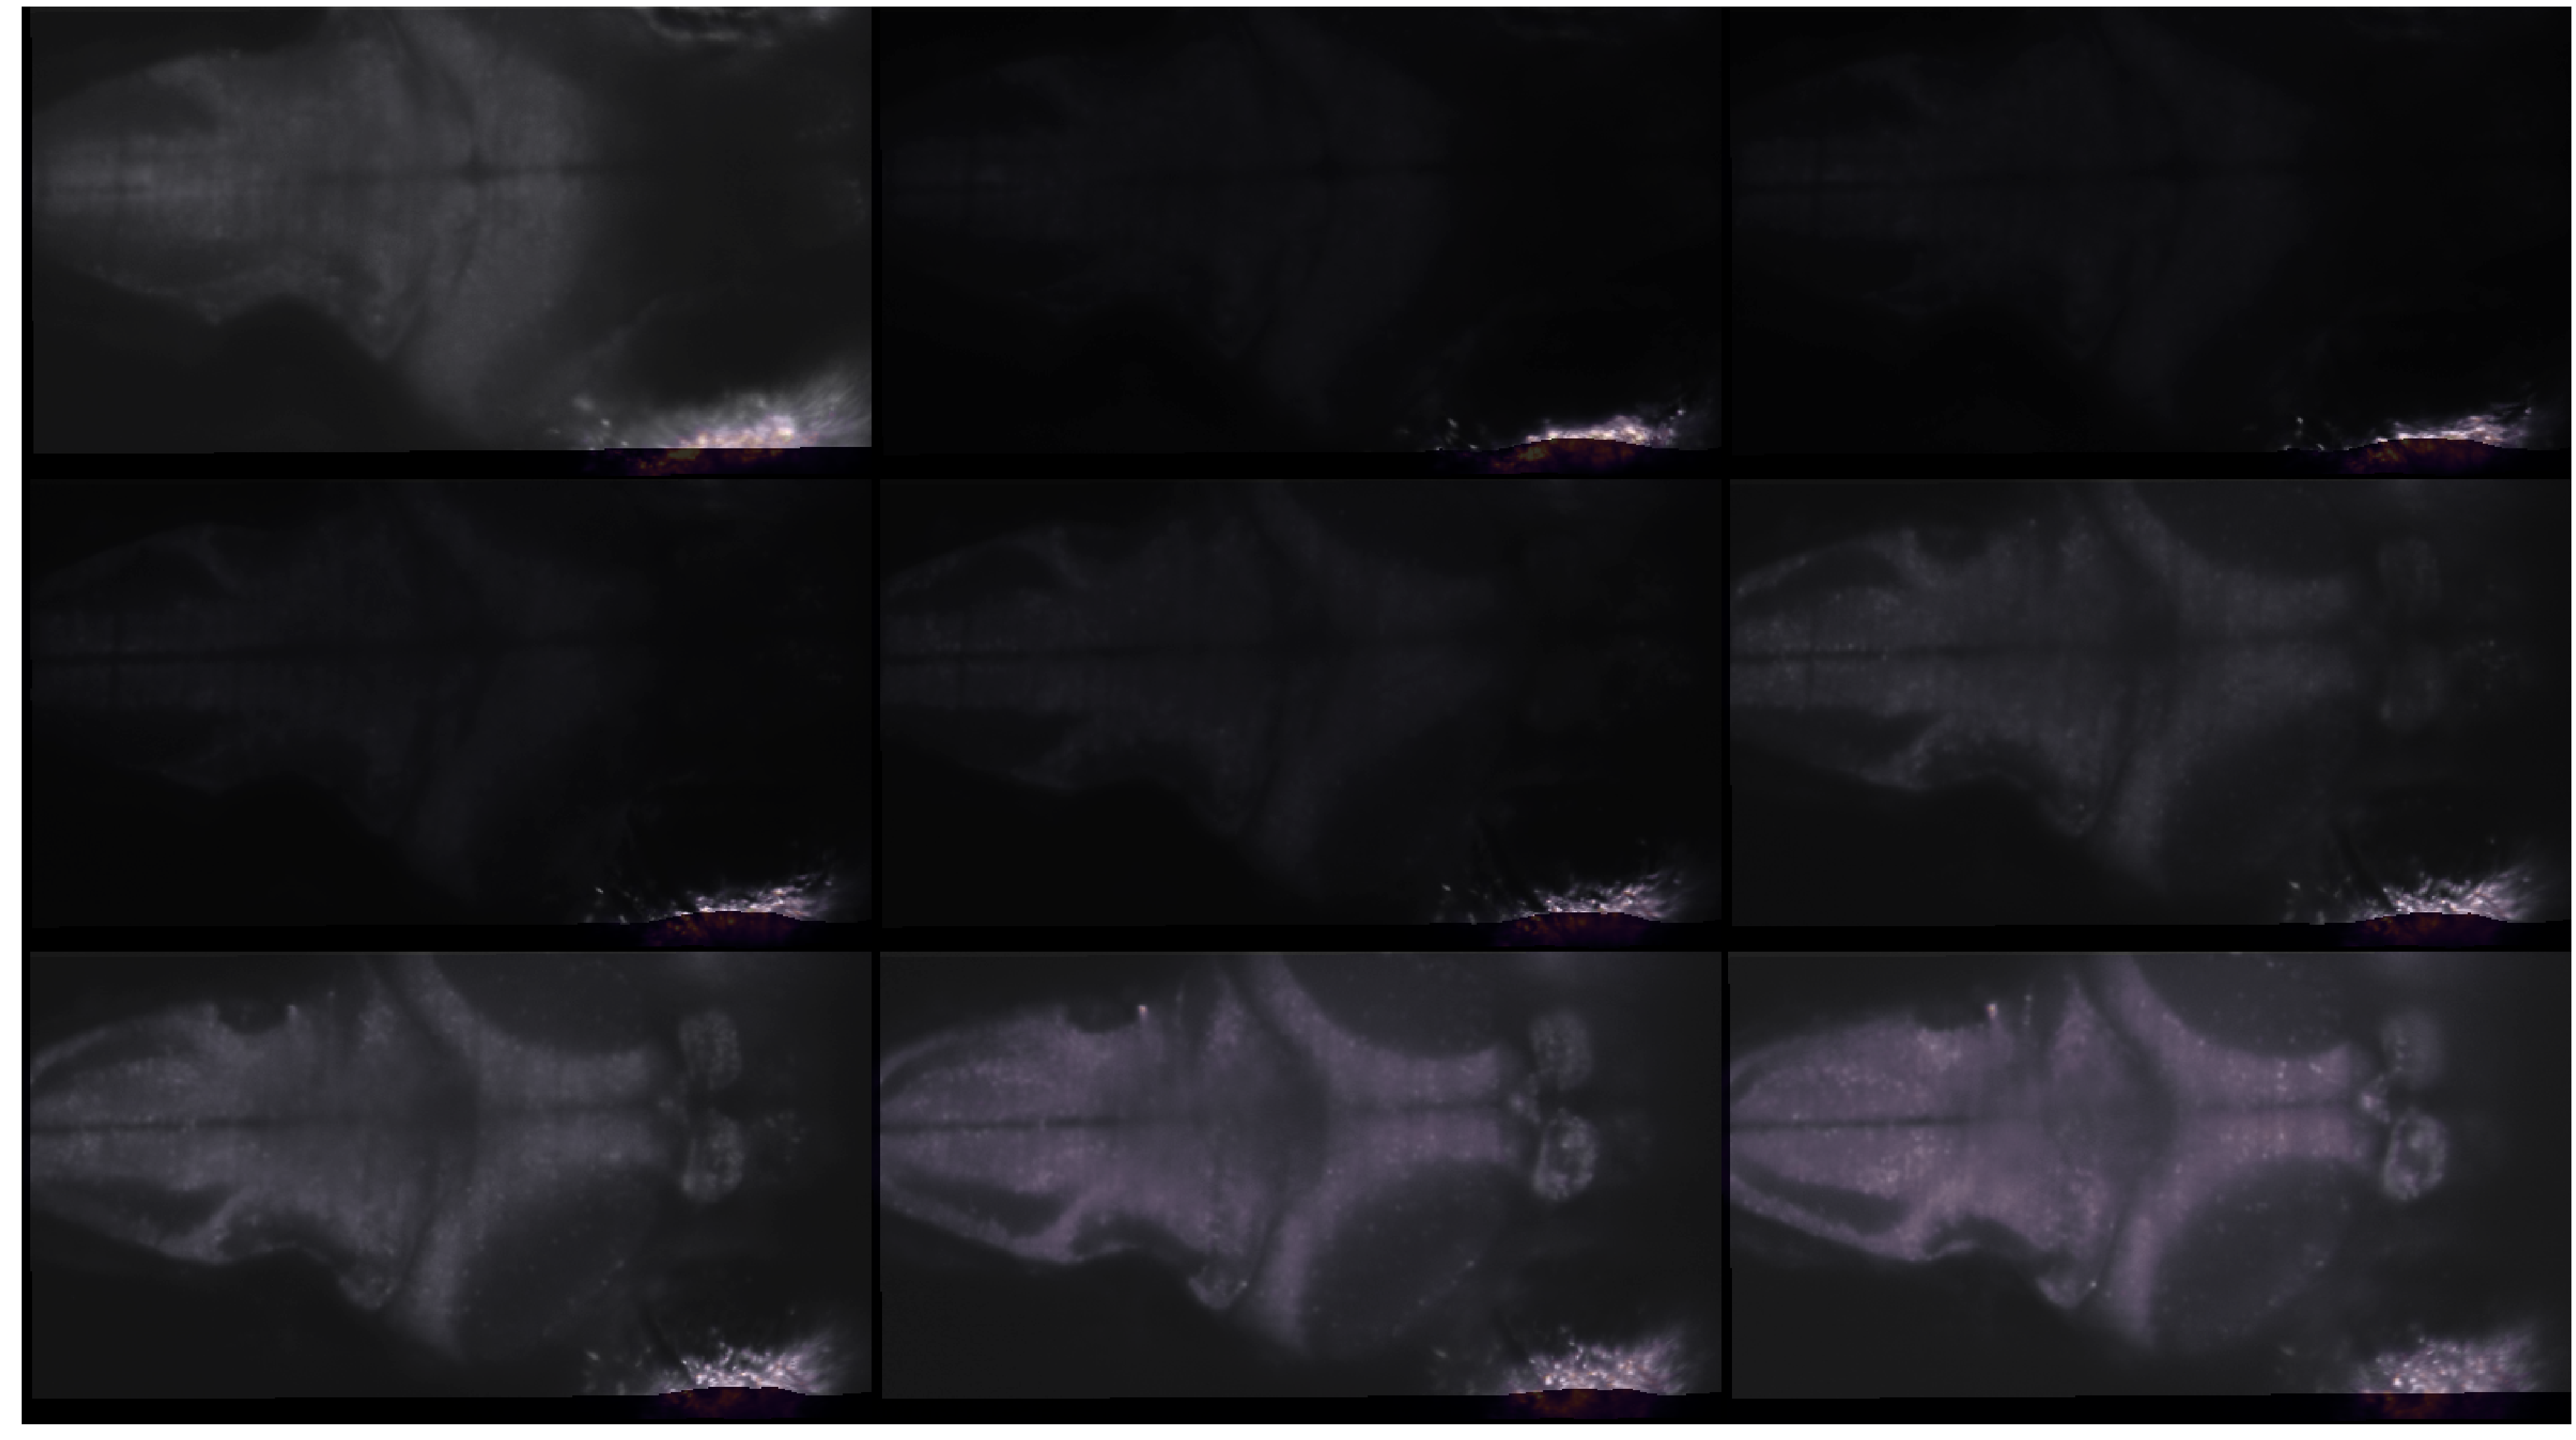

In [16]:
ants.plot(moved[1], overlay = moved[3500], overlay_alpha = .2, overlay_cmap = 'magma',
          axis = 2, slices = range(9), figsize =  10)

In [19]:
for i in range(10): print(i)

0
1
2
3
4
5
6
7
8
9
